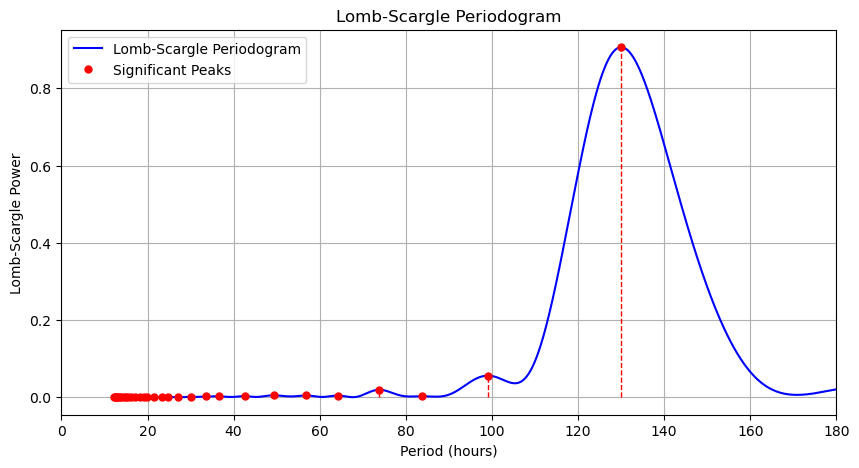

In [113]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks


def analyze_txt_file(file_path):
    
    data = np.loadtxt(file_path)

    
    time = data[:, 1]  
    magnitude = data[:, 4] 

    ls = LombScargle(time, magnitude)

    cadence = input("Input the cadence in hours: ")

    try:
        cadence_hours = float(cadence)
        if cadence_hours <= 0:
            raise ValueError("Invalid cadence value. Cadence must be greater than 0.")
    except ValueError:
        print("Invalid input for cadence. Please enter a valid numeric value.")
        return

    max_frequency = 1 / cadence_hours
    frequency = np.linspace(0.01, max_frequency, 10000)
    power = ls.power(frequency, normalization='standard')  
    period = 24 / frequency  

   
    plt.figure(figsize=(10, 5))
    plt.plot(period, power, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (hours)')
    plt.ylabel('Lomb-Scargle Power')
    plt.xlim(0, 180)  # Limit x-axis to 180 hours
    plt.title('Lomb-Scargle Periodogram')
    plt.grid(True)
    
    
    peaks, _ = find_peaks(power, height=0)
        print("Significant peaks:")
     for peak_index in peaks:
        peak_period = period[peak_index]
        peak_power = power[peak_index]
        print(f"Period: {peak_period:.2f} hours, Power: {peak_power:.2f}")

    peaks, _ = find_peaks(power, height=0)
    plt.plot(period[peaks], power[peaks], 'ro', markersize=5, label='Significant Peaks')
    
    for peak_index in peaks:
        plt.plot([period[peak_index], period[peak_index]], [0, power[peak_index]], 'r--', linewidth=1)

    plt.legend()  
    plt.show()


file_path = r"c:\Users\eitan\code repos\data\extracted tarballs\sector26\cam4_ccd1\lc_discovery\lc_2020nww_cleaned.txt"


if os.path.exists(file_path):
    analyze_txt_file(file_path)
else:
    print("File not found. Please make sure the file path is correct and the file exists.")
